In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
boston = load_boston()

In [4]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X = boston_df.RM
X.shape

(506,)

In [7]:
X = np.vstack(X)
X.shape

(506, 1)

In [8]:
Y = boston_df.Price

In [9]:
X = np.array([[x, 1] for x in X])

In [10]:
import sklearn
from sklearn.linear_model import LinearRegression

In [11]:
linreg = LinearRegression()

In [12]:
X_multi = boston_df.drop('Price', 1)

Y_target = boston_df.Price

In [13]:
linreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print 'The estimated intercept coefficient is %.2f' %linreg.intercept_

print 'The number of coefficients used was %d' %len(linreg.coef_)

The estimated intercept coefficient is 36.49
The number of coefficients used was 13


In [15]:
coeff_df = DataFrame(boston_df.columns)

coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(linreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [16]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, boston_df.Price)

In [17]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 2) (127, 2) (379,) (127,)


In [18]:
linreg = LinearRegression()

linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
pred_train = linreg.predict(X_train)

pred_test = linreg.predict(X_test)

In [20]:
print 'Fit a model with X_train, and calculate the MSE with Y_train: %.2f' % np.mean((Y_train - pred_train)**2)

print 'Fit a model with X_train, and calculate the MSE with X_test and Y_test: %.2f' % np.mean((Y_test - pred_test)**2)

Fit a model with X_train, and calculate the MSE with Y_train: 42.65
Fit a model with X_train, and calculate the MSE with X_test and Y_test: 46.62


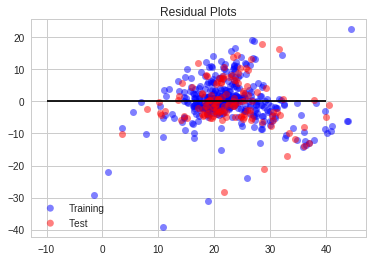

In [21]:
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=40)

plt.legend((train, test), ('Training', 'Test'), loc='lower left')

plt.title('Residual Plots')